In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
data = pd.read_csv('BostonHousing.csv')

In [ ]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,NaN,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
data.rename(columns={
    "crim": "CrimeRate",
    "zn": "ResidentialLand",
    "indus": "BusinessLand",
    "chas": "NearRiver",
    "nox": "AirPollution",
    "rm": "AvgRooms",
    "age": "OldHomesPercent",
    "dis": "EmploymentDistance",
    "rad": "HighwayAccess",
    "tax": "PropertyTax",
    "ptratio": "StudentTeacherRatio",
    "b": "DiversityIndex",
    "lstat": "LowIncomePercent",
    "medv": "HousePrice"
}, inplace=True)

In [ ]:
data.isna().sum()

,0
CrimeRate,0
ResidentialLand,1
BusinessLand,1
NearRiver,0
AirPollution,0
AvgRooms,5
OldHomesPercent,0
EmploymentDistance,0
HighwayAccess,0
PropertyTax,1


In [ ]:
data.columns

Index(['CrimeRate', 'ResidentialLand', 'BusinessLand', 'NearRiver',
       'AirPollution', 'AvgRooms', 'OldHomesPercent', 'EmploymentDistance',
       'HighwayAccess', 'PropertyTax', 'StudentTeacherRatio', 'DiversityIndex',
       'LowIncomePercent', 'HousePrice'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CrimeRate            506 non-null    float64
 1   ResidentialLand      505 non-null    float64
 2   BusinessLand         505 non-null    float64
 3   NearRiver            506 non-null    int64  
 4   AirPollution         506 non-null    float64
 5   AvgRooms             501 non-null    float64
 6   OldHomesPercent      506 non-null    float64
 7   EmploymentDistance   506 non-null    float64
 8   HighwayAccess        506 non-null    int64  
 9   PropertyTax          505 non-null    float64
 10  StudentTeacherRatio  506 non-null    float64
 11  DiversityIndex       506 non-null    float64
 12  LowIncomePercent     505 non-null    float64
 13  HousePrice           506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
data['DiversityIndex'].describe()

,DiversityIndex
count,506.000000
mean,356.674032
std,91.294864
min,0.320000
25%,375.377500
50%,391.440000
75%,396.225000
max,396.900000


<Axes: >

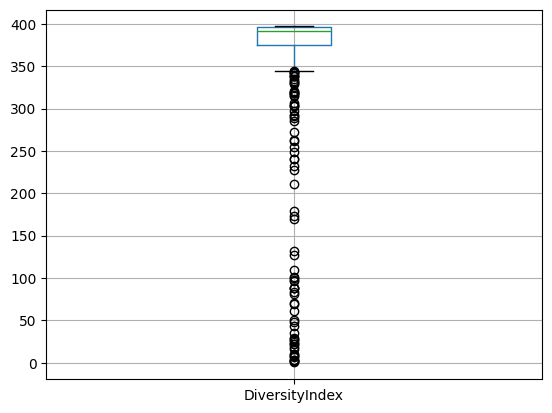

In [ ]:
data.boxplot('DiversityIndex')

In [ ]:
data[data['DiversityIndex']<350].shape

(82, 14)

In [ ]:
data[data['DiversityIndex'] >= 350].shape

(424, 14)

In [ ]:
data = data[data['DiversityIndex'] >= 350]

In [ ]:
data.shape

(424, 14)

In [ ]:
data.reset_index(drop=True,inplace=True)
data

,CrimeRate,ResidentialLand,BusinessLand,NearRiver,AirPollution,AvgRooms,OldHomesPercent,EmploymentDistance,HighwayAccess,PropertyTax,StudentTeacherRatio,DiversityIndex,LowIncomePercent,HousePrice
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,NaN,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
420,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
421,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
422,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
data.isna().sum()

,0
CrimeRate,0
ResidentialLand,1
BusinessLand,1
NearRiver,0
AirPollution,0
AvgRooms,5
OldHomesPercent,0
EmploymentDistance,0
HighwayAccess,0
PropertyTax,1


In [ ]:
imputer = SimpleImputer(strategy='mean')
feature_columns = data.drop('HousePrice', axis=1).columns
imputer.fit(data[feature_columns])
data_imputed = pd.DataFrame(imputer.transform(data[feature_columns]), columns=feature_columns)

In [ ]:
data_imputed.isna().sum()

,0
CrimeRate,0
ResidentialLand,0
BusinessLand,0
NearRiver,0
AirPollution,0
AvgRooms,0
OldHomesPercent,0
EmploymentDistance,0
HighwayAccess,0
PropertyTax,0


In [ ]:
data_imputed['HousePrice'] = data['HousePrice']
data_imputed.isna().sum()

,0
CrimeRate,0
ResidentialLand,0
BusinessLand,0
NearRiver,0
AirPollution,0
AvgRooms,0
OldHomesPercent,0
EmploymentDistance,0
HighwayAccess,0
PropertyTax,0


In [ ]:
data_imputed = data_imputed.dropna()

In [ ]:
data_imputed.isna().sum()

,0
CrimeRate,0
ResidentialLand,0
BusinessLand,0
NearRiver,0
AirPollution,0
AvgRooms,0
OldHomesPercent,0
EmploymentDistance,0
HighwayAccess,0
PropertyTax,0


In [ ]:
data_imputed.head()

,CrimeRate,ResidentialLand,BusinessLand,NearRiver,AirPollution,AvgRooms,OldHomesPercent,EmploymentDistance,HighwayAccess,PropertyTax,StudentTeacherRatio,DiversityIndex,LowIncomePercent,HousePrice
0,0.00632,18.0,2.310000,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.070000,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,9.924444,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.180000,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.180000,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
scaler = StandardScaler()
X = data_imputed.drop('HousePrice', axis=1)
y = data_imputed['HousePrice']

In [ ]:
X = scaler.fit_transform(X)
X

array([[-0.33807432,  0.18757564, -1.14864623, ..., -1.41495078,
         0.74819431, -0.97780108],
       [-0.33510615, -0.54240184, -0.43059568, ..., -0.24346923,
         0.74819431, -0.34475815],
       [-0.33510898, -0.54240184,  0.        , ..., -0.24346923,
         0.3533708 , -1.12236617],
       ...,
       [-0.33037603, -0.54240184,  0.30253997, ...,  1.25602715,
         0.74819431, -0.87736639],
       [-0.32347103, -0.54240184,  0.30253997, ...,  1.25602715,
         0.4135159 , -0.74954041],
       [-0.33226383, -0.54240184,  0.30253997, ...,  1.25602715,
         0.74819431, -0.53649712]])

In [ ]:
df = pd.DataFrame(X)

In [ ]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 25.780810983550023
Mean Absolute Error (MAE): 3.3969480605592546
R-squared (R²): 0.6754062470224533


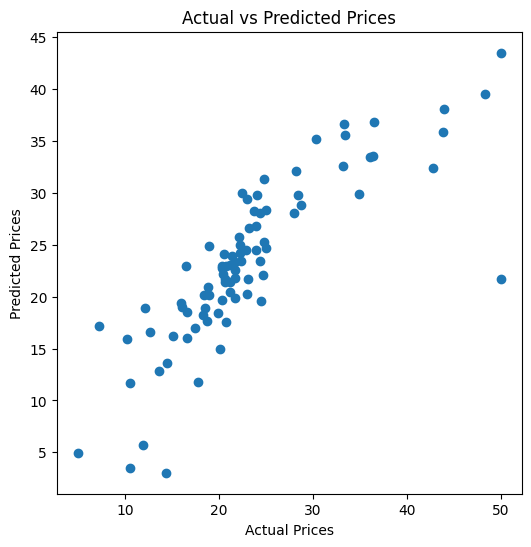

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
new_data = [[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]]
new_data_df = pd.DataFrame(new_data, columns=data_imputed.drop('HousePrice', axis=1).columns)
new_data_imputed = imputer.transform(new_data_df)
new_data_scaled = scaler.transform(new_data_imputed)
prediction = lr.predict(new_data_scaled)
print("Predicted Price for unseen sample:", prediction[0])

Predicted Price for unseen sample: 29.780882474199323


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


In [ ]:
# Get feature importance
importance = rf.feature_importances_

# Display feature importance
for i, col in enumerate(X.columns):
    print(f"{col}: {importance[i]}")


In [ ]:
new_data = [[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]]
new_data_df = pd.DataFrame(new_data, columns=data_imputed.drop('HousePrice', axis=1).columns)
new_data_imputed = imputer.transform(new_data_df)
new_data_scaled = scaler.transform(new_data_imputed)
prediction = rf.predict(new_data_scaled)
print("Predicted Price for unseen sample:", prediction[0])